In [3]:
import pandas as pd
import numpy as np

from images import Images, now, save, load
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px

In [6]:
filepath = "/Volumes/STORAGE FD/Machine Learning Project/objects/24k_sample_train_and_test_features_.pickle"

In [7]:
images = load(filepath)

[21:51:12]: Start
[21:51:15]: End


<h3> 1. Transforming Images into numpy arrays </h3> 

In [105]:
X_train_np = np.array(images.train_X)
y_train = np.array(images.train_Y)
X_test_np = np.array(images.test_X)
y_test = np.array(images.test_Y)

### 2. Feature Dataset

In [151]:
features = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 
            'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
            'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8',
            'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
            'H_MX', 'S_MX', 'V_MX',
            'L1', 'L2', 'L3', 'L4',
            'ED1', 'ED2', 'ED3', 
            'DARKRATIO',
            'ETR1', 'ETR2', 'ETR3', 'ETR4']

In [154]:
def flatten(i, ds):
    bgr = ds[i][0:24]
    hsv = ds[i][24:25][0]
    hsvmx = np.array(ds[i][25:26][0])
    lummean = ds[i][26:27][0]
    edmean = ds[i][27:28][0]
    dr = ds[i][28:29]
    etrmean = ds[i][29:30][0]

    arrays = (bgr, hsv,hsvmx,lummean,edmean,dr,etrmean)
    new_array = np.hstack(arrays)
    return new_array

In [155]:
X_train_new = np.array([flatten(i, X_train_np) for i in range(0,len(X_train_np))])
X_test_new = np.array([flatten(i, X_test_np) for i in range(0,len(X_test_np))])

In [156]:
renamed_cols = {old:new for old,new in zip([i for i in range(0,63)], features)}
train_df = pd.DataFrame(X_train_new).rename(renamed_cols,axis=1).astype(float)
train_df['genre'] = y_train

In [188]:
test_df = pd.DataFrame(X_test_new).rename(renamed_cols,axis=1).astype(float)
test_df['genre'] = y_test

In [189]:
whole_df = pd.concat([train_df,test_df]).reset_index().drop(['index'],axis=1)

In [192]:
print(len(whole_df))
print(train_df.shape)
print(test_df.shape)

24000
(16800, 64)
(7200, 64)


## RGB

## HSV

## Lumnosity

## Edges

## Entropy

## Ratio of Dark Pixels

In [193]:
edges = whole_df.groupby(['genre']).mean().loc[:,'ED1':'ED3']
edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('value')

fig = px.bar(edges_melt, color='genre',x='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=px.colors.qualitative.Set3, title="Mean Edge Ratio",)
fig.show()

In [194]:
darkratios = whole_df.groupby(['genre']).mean().loc[:,'DARKRATIO']

fig = px.bar(darkratios.sort_values(), x=darkratios.index, y='DARKRATIO',barmode='group',template='simple_white',
            color_discrete_sequence=px.colors.qualitative.Set3, title="Mean Dark Ratio")
fig.show()

In [195]:
edges = whole_df.groupby(['genre']).mean().loc[:,'R1':'R8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["indianred"], title="Mean Red Histogram (Normalized) in 8 intervals")
fig.show()

In [196]:
edges = whole_df.groupby(['genre']).mean().loc[:,'B1':'B8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["cornflowerblue"], title="Mean Blue Histogram (Normalized) in 8 intervals")
fig.show()

In [197]:
edges = whole_df.groupby(['genre']).mean().loc[:,'G1':'G8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["mediumseagreen"], 
             title="Mean Green Histogram (Normalized) in 8 intervals")

fig.show()

In [198]:
edges = whole_df.groupby(['genre']).mean().loc[:,'S1':'S8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["slategray"], 
             title="Mean Saturation Histogram (Normalized) in 8 intervals")

fig.show()

In [199]:
edges = whole_df.groupby(['genre']).mean().loc[:,'V1':'V8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["slategray"], 
             title="Mean V (luminance) (Normalized) in 8 intervals")

fig.show()

In [200]:
edges = whole_df.groupby(['genre']).mean().loc[:,'L1':'L4']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=['lightsteelblue','cornflowerblue','darksalmon','coral'], title="Mean Lumnosity per Quadrant")
fig.show()

In [201]:
edges = whole_df.groupby(['genre']).mean().loc[:,'ETR1':'ETR4']

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')
fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=['lightsteelblue','cornflowerblue','darksalmon','coral'], 
             title="Mean Entropy per Quadrant")

fig.show()

<h3> 3. Scaling feature set </h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.model import train_test_split

In [235]:
scaler = StandardScaler()

print(now(), "Starting")
X_train_scaled = scaler.fit_transform(X_train_new)
print(now(), "Finished training dataset, Starting testing set")
X_test_scaled = scaler.transform(X_test_new)
print(now(), "Finished")

[00:58:05] Starting
[00:58:05] Finished training dataset, Starting testing set
[00:58:05] Finished


<h3> 4. Models </h3>

In [239]:
models = {
    "Logistic Regression" : LogisticRegression(multi_class='multinomial',tol=.01,solver='sag'),
    "KNearest Neighbors (n=3)" : KNeighborsClassifier(3),
    "Support Vector Machines" : svm.SVC(decision_function_shape='ovo'),
    "AdaBoost - Logistic Regression" : AdaBoostClassifier(LogisticRegression(multi_class='multinomial',tol=.01,solver='sag'),n_estimators=100),
    "AdaBoost - Decision Trees (entropy)" :  AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5) ,n_estimators=100),
    "AdaBoost - Decision Trees (gini)" :  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7) ,n_estimators=100),
         }

In [240]:
models_y_train = dict()
models_y_test = dict()

for name, model in models.items():
    print("Model:",name, end=" | ")
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled) 
    train_acc = accuracy_score(y_train,y_train_pred)
    
    models_y_train[name] = (y_train,y_train_pred)
    
    y_test_pred = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test,y_test_pred)
    
    models_y_test[name] = (y_test,y_test_pred)
    
    print("train accuracy:", round(train_acc,3) , "test accuracy: ", round(test_acc,3))

Model: Logistic Regression | train accuracy: 0.254 test accuracy:  0.235
Model: KNearest Neighbors (n=3) | train accuracy: 0.507 test accuracy:  0.203
Model: Support Vector Machines | train accuracy: 0.418 test accuracy:  0.282
Model: AdaBoost - Logistic Regression | train accuracy: 0.216 test accuracy:  0.209
Model: AdaBoost - Decision Trees (entropy) | train accuracy: 0.392 test accuracy:  0.194
Model: AdaBoost - Decision Trees (gini) | train accuracy: 0.57 test accuracy:  0.2


### 5. Metrics

In [220]:
def output_metrics(y, yhat, name, output=False):
    df = pd.DataFrame({"observed" : y, "predicted": yhat})
    df['count'] = 1
    sorted_df = df.groupby(["observed","predicted"]).sum().sort_values(['count'], ascending=False)
    
    genres = np.unique(y_train)
    combos = list(sorted_df.index)
    
    genre_pref = []
        
    for genre in genres:
        try:
            tp = sorted_df.loc[genre,genre]['count']
        except KeyError as e:
            tp = 0
        
        fp = len(df[df['predicted'] == genre]) - tp
        tmp = df[df['predicted'] != genre]
        tn = len(tmp[tmp['observed'] != genre])
        fn = len(df[df['observed'] == genre]) - tp
        
        accuracy, precision, recall, f1, fpr = report_metrics(tn, fp, fn, tp, genre, False)
        
        genre_pref.append(pd.Series({
            'genre' : genre,
            'accuracy' : accuracy,
            'f1' : f1,
            'precision' : precision,
            'recall' : recall,
            'fpr' : fpr
        }))
    
    cf_matrix = create_conf_matrix(df,sorted_df, genres, combos)
    
    if output:
        colormap = sns.color_palette("Greens")
        sns.set(rc={'figure.figsize':(10,8.27)})
        ax = sns.heatmap(cf_matrix.astype(int), annot=True,cmap=colormap)
        ax.set_title(name)
    
    cmatrix = pd.concat(genre_pref,axis=1).T
    
    return cmatrix.sort_values('recall',ascending=False)

In [211]:
def create_conf_matrix(df, sorted_df, genres, combos):
    rows = []
    for genre_row in genres:
        row_dict = dict()
        row_dict['predicted_genre'] = genre_row
        
        for genre_col in genres:
            pair = (genre_col, genre_row)
            if pair in combos: # observed, predicted
                num = sorted_df.loc[pair]['count']
            else:
                num = 0
            row_dict[genre_col] = num
        rows.append(pd.Series(row_dict))
        
    matrix = pd.concat(rows, axis=1).T
    matrix.index = matrix['predicted_genre']
    matrix.drop(['predicted_genre'],axis=1,inplace=True)
        
    return matrix

In [212]:
def report_metrics(tn, fp, fn, tp, genre, output=True):
    """
    Manually calculates associated scores and outputs them
    """
    conf_matrix = pd.DataFrame({f"Obsv {genre}" : [tp, fn], f"Obsv not {genre}" : [fp, tn]}).rename({0:f'Pred {genre}', 1:'Pred Neg'})
    
    accuracy = (tp + tn) / (tp + fp + fn + tn)    
    precision = (tp) / (tp + fp) 
    recall = (tp) / (tp + fn) ## TPR
    
    if tp != 0:
        f1 = 2 * ((precision * recall) / (precision + recall))
    else:
        f1 = 0

    fpr = fp / (fp + tn)
    
    if output:
        display(conf_matrix)
        print(f"True Positives: {tp}, False Positives: {fp}, True Negatives: {tn}, False Negatives: {fn}")
        print(f"Accuracy: {round(accuracy, 5)}, Error: {round(1 - accuracy, 5)}""")
        print(f"Precision: {round(precision, 5)}, Recall: {round(recall, 5)}")
        print(f"F1-score: {round(f1,5)}")

    return accuracy, precision, recall, f1, fpr

,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.890972,0.319167,0.273403,0.383333,0.0727679
5,Impressionism,0.886667,0.298969,0.254386,0.3625,0.0758929
2,Baroque,0.887778,0.287478,0.249235,0.339583,0.0730655
0,Abstract Expressionism,0.883056,0.275387,0.234604,0.333333,0.0776786
3,Cubism,0.899861,0.289655,0.274766,0.30625,0.0577381
1,Art Nouveau (Modern),0.887083,0.258888,0.230146,0.295833,0.0706845
8,Northern Renaissance,0.896111,0.268102,0.252768,0.285417,0.0602679
7,Neoclassicism,0.904722,0.279412,0.28178,0.277083,0.0504464
14,Symbolism,0.885,0.189824,0.178967,0.202083,0.0662202
9,Post-Impressionism,0.899861,0.192609,0.208232,0.179167,0.0486607


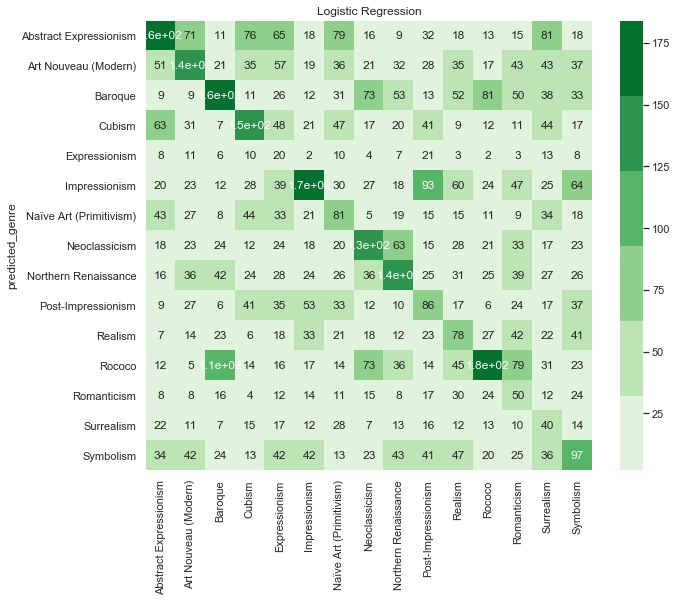

In [241]:
n = 0

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name, True)
cmatrix_genre   

KNearest Neighbors (n=3)


,genre,accuracy,f1,precision,recall,fpr
2,Baroque,0.839444,0.265565,0.191042,0.435417,0.131696
0,Abstract Expressionism,0.858889,0.256223,0.197517,0.364583,0.105804
1,Art Nouveau (Modern),0.857083,0.234944,0.182659,0.329167,0.105208
7,Neoclassicism,0.904583,0.303951,0.295858,0.3125,0.053125
5,Impressionism,0.886944,0.221797,0.204947,0.241667,0.0669643
3,Cubism,0.866528,0.193115,0.161744,0.239583,0.0886905
8,Northern Renaissance,0.904722,0.242826,0.258216,0.229167,0.0470238
11,Rococo,0.916389,0.222222,0.292517,0.179167,0.0309524
6,Naïve Art (Primitivism),0.902083,0.186851,0.209302,0.16875,0.0455357
4,Expressionism,0.8725,0.129032,0.118467,0.141667,0.0752976


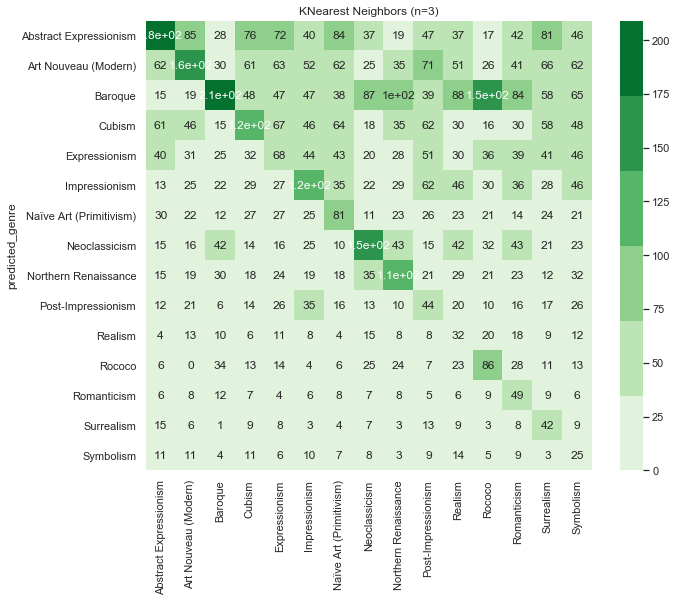

In [250]:
n = 1

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name, True)
print(name)
cmatrix_genre   

Support Vector Machines


,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.894444,0.365609,0.305014,0.45625,0.074256
2,Baroque,0.892083,0.342083,0.28816,0.420833,0.074256
0,Abstract Expressionism,0.901667,0.355191,0.315534,0.40625,0.0629464
5,Impressionism,0.883056,0.316558,0.259309,0.40625,0.0828869
1,Art Nouveau (Modern),0.887639,0.321878,0.269285,0.4,0.0775298
8,Northern Renaissance,0.909861,0.361849,0.342644,0.383333,0.0525298
3,Cubism,0.908472,0.296692,0.304158,0.289583,0.0473214
7,Neoclassicism,0.933056,0.359043,0.496324,0.28125,0.0203869
6,Naïve Art (Primitivism),0.916667,0.271845,0.325581,0.233333,0.0345238
14,Symbolism,0.888194,0.208456,0.197393,0.220833,0.0641369


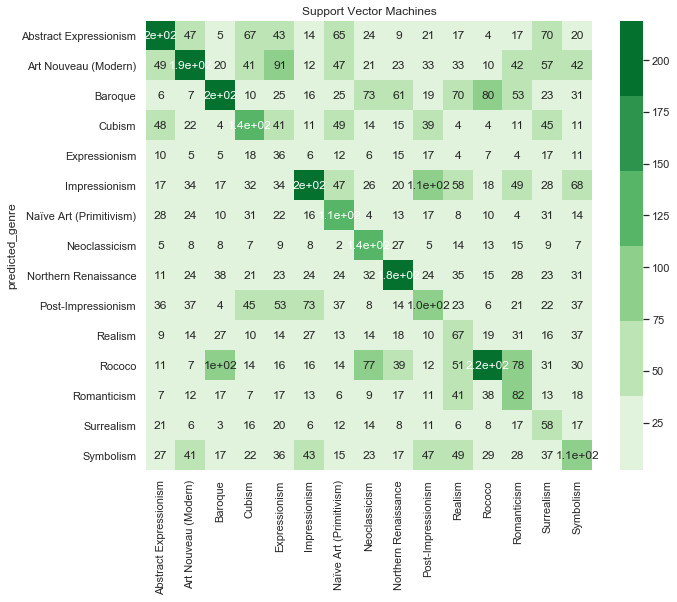

In [251]:
n = 2

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name, True)
print(name)
cmatrix_genre   

,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.882083,0.312551,0.255629,0.402083,0.083631
5,Impressionism,0.871944,0.258842,0.210733,0.335417,0.0897321
8,Northern Renaissance,0.87625,0.251889,0.21097,0.3125,0.0834821
2,Baroque,0.8825,0.248668,0.216718,0.291667,0.0752976
0,Abstract Expressionism,0.884306,0.248873,0.219396,0.2875,0.0730655
1,Art Nouveau (Modern),0.876111,0.228374,0.195266,0.275,0.0809524
3,Cubism,0.911944,0.255869,0.293011,0.227083,0.0391369
7,Neoclassicism,0.892917,0.209231,0.206061,0.2125,0.0584821
14,Symbolism,0.886528,0.185444,0.17782,0.19375,0.0639881
9,Post-Impressionism,0.895694,0.166482,0.178147,0.15625,0.0514881


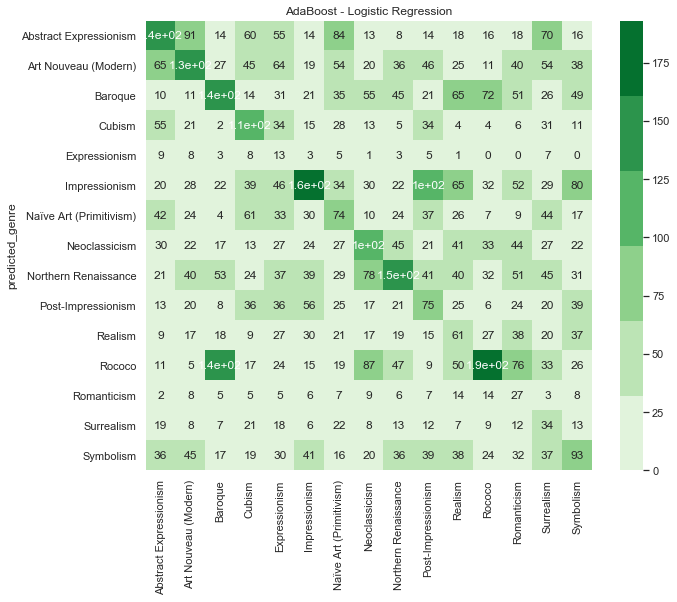

In [252]:
n = 3

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name, True)
cmatrix_genre   

,genre,accuracy,f1,precision,recall,fpr
1,Art Nouveau (Modern),0.8925,0.258621,0.239362,0.28125,0.0638393
5,Impressionism,0.886944,0.227704,0.209059,0.25,0.0675595
11,Rococo,0.898333,0.243802,0.241803,0.245833,0.0550595
2,Baroque,0.896389,0.234086,0.230769,0.2375,0.0565476
8,Northern Renaissance,0.893056,0.215886,0.211155,0.220833,0.0589286
7,Neoclassicism,0.909028,0.242775,0.272727,0.21875,0.0416667
10,Realism,0.878056,0.166983,0.15331,0.183333,0.0723214
3,Cubism,0.908194,0.204573,0.242165,0.177083,0.0395833
0,Abstract Expressionism,0.914028,0.207426,0.269103,0.16875,0.0327381
14,Symbolism,0.883889,0.158954,0.153696,0.164583,0.0647321


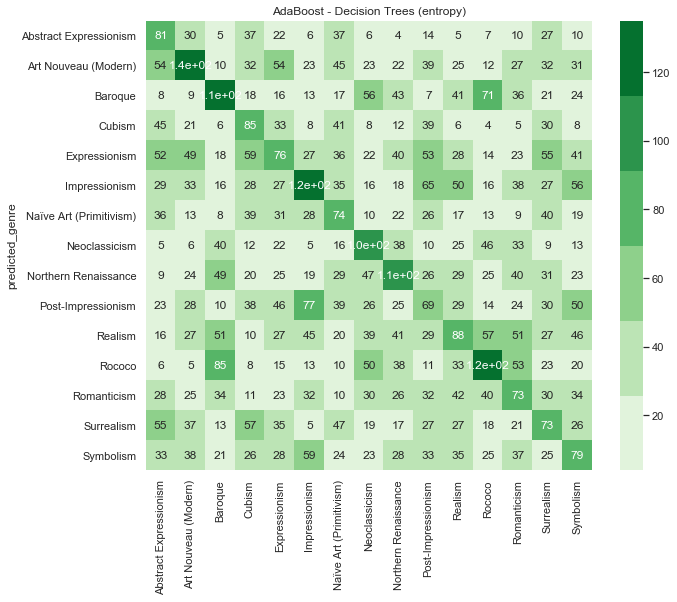

In [249]:
n = 4

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name, True)
cmatrix_genre   